In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [3]:
# Load the data
data = pd.read_csv(r"F:\Climate Paper\Data\My Research Data.csv")  # Replace with your actual file
data.head()

,year,Bhutan,Bangladesh,India,Nepal,Pakistan
0,1850,0.23,6.34,83.03,1.14,-0.03
1,1851,0.21,5.41,64.25,1.04,-0.05
2,1852,0.37,5.27,54.26,1.00,-0.07
3,1853,0.28,5.06,48.19,0.97,-0.10
4,1854,0.27,5.25,43.87,0.95,-0.11


In [4]:
# Feature engineering: Set the 'year' as the index
data.set_index('year', inplace=True)

In [5]:
# Scaling the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [6]:
# Create sequences for LSTM
sequence_length = 10  # Define the sequence length (lookback period)
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

X, y = create_sequences(data_scaled, sequence_length)

In [7]:
# Split the data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [8]:
# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(sequence_length, X.shape[2])),
    LSTM(50, activation='relu'),
    Dense(X.shape[2])  # Output layer matches the number of features
])
model.compile(optimizer='adam', loss='mse')

C:\Miniconda3\envs\jupyter-nb\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - loss: 0.1338 - val_loss: 0.0990
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1103 - val_loss: 0.0725
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0712 - val_loss: 0.0503
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0394 - val_loss: 0.0483
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0371 - val_loss: 0.0365
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0317 - val_loss: 0.0327
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0271 - val_loss: 0.0373
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0260 - val_loss: 0.0435
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0260 - val_loss: 0.0463
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0239 - val_loss: 0.0440
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0263 - val_loss: 0.0400
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0257 - val_loss: 0.0367


In [10]:
# Predict on the test data
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 273ms/step


In [11]:
# Future prediction
future_steps = 50
future_input = X_test[-1]
future_predictions = []
for _ in range(future_steps):
    future_output = model.predict(future_input[np.newaxis, ...])
    future_predictions.append(future_output[0])
    future_input = np.append(future_input[1:], [future_output[0]], axis=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

In [12]:
# Inverse scale the predictions
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)
future_predictions_rescaled = scaler.inverse_transform(future_predictions)

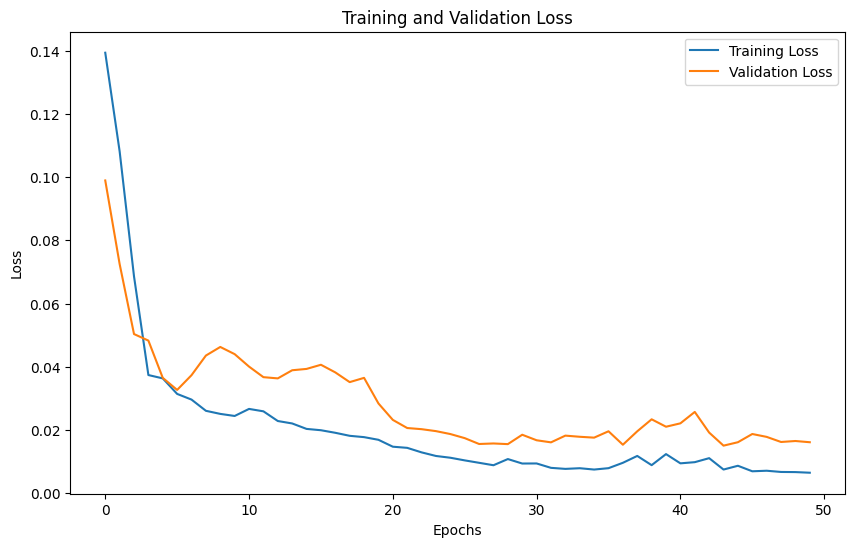

In [13]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (43,) and (33, 5)

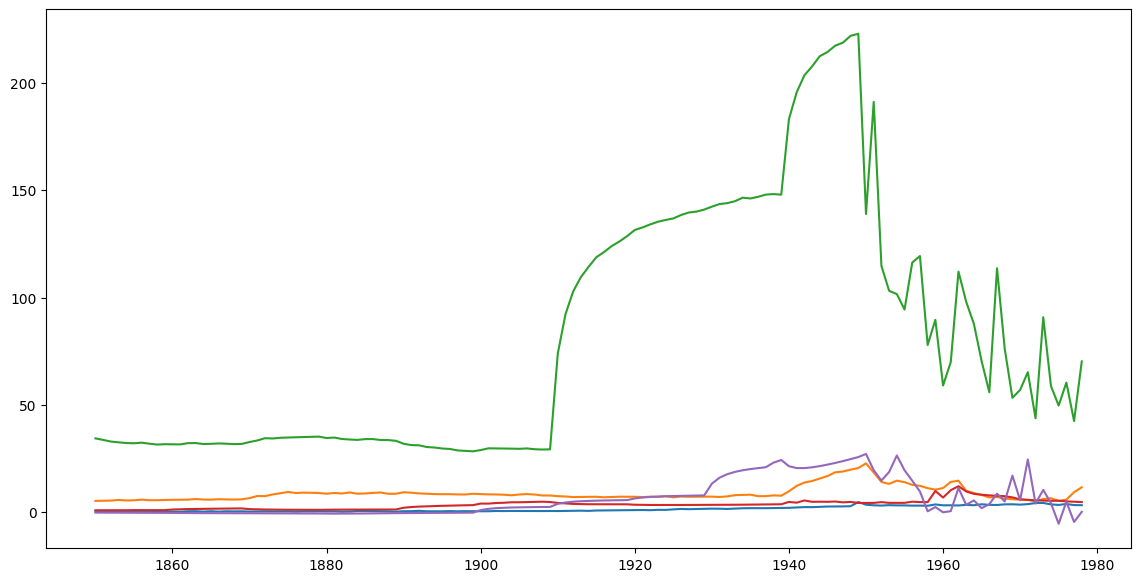

In [14]:
# Plot training and test data
train_index = data.index[:train_size]
test_index = data.index[train_size:]
plt.figure(figsize=(14, 7))
plt.plot(train_index, scaler.inverse_transform(y_train), label='Training Data')
plt.plot(test_index, y_test_rescaled, label='Test Data', linestyle='dashed')
plt.plot(test_index, y_pred_rescaled, label='Predicted Test Data', linestyle='dotted')
plt.title('Training and Test Data with Predictions')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.legend()
plt.show()

C:\Users\WindowS 10\AppData\Local\Temp\ipykernel_4540\3012150276.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_index = pd.date_range(start=test_index[-1], periods=future_steps, freq='Y')


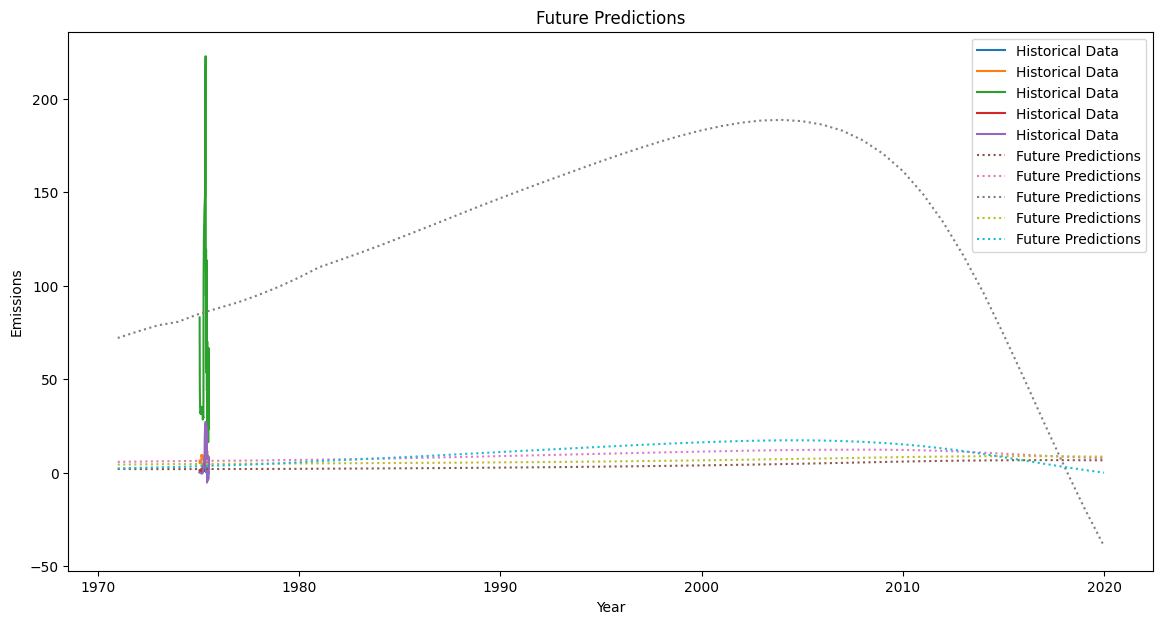

In [15]:
# Plot future predictions
future_index = pd.date_range(start=test_index[-1], periods=future_steps, freq='Y')
plt.figure(figsize=(14, 7))
plt.plot(data.index, scaler.inverse_transform(data_scaled), label='Historical Data')
plt.plot(future_index, future_predictions_rescaled, label='Future Predictions', linestyle='dotted')
plt.title('Future Predictions')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.legend()
plt.show()